In [35]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [36]:
train['ClickProbability'] = train.Clicks/train.Impressions
train['ClickProbability'].fillna(train.Clicks.sum()/train.Impressions.sum(), inplace=True)

In [37]:
train.drop(['Clicks','Impressions', 'Query'], axis=1, inplace=True)
test.drop(['RowId'], axis=1, inplace=True)

In [38]:
train['Date']=pd.to_datetime(train['Date'])
test['Date']=pd.to_datetime(test['Date'])
train['WorkDay']=map(lambda d: int(0<=d.weekday()<=4), train['Date'])

In [39]:
train.drop(['Date'], axis=1, inplace=True)
train.head(10)

,CampaignId,AdGroupId,KeywordId,QueryMatchTypeWithVariant,Device,AveragePosition,ClickProbability,WorkDay
0,150950690.0,7.953835e+09,116881275.0,NEAR_EXACT,HIGH_END_MOBILE,1.0,1.0,1
1,150950690.0,7.953835e+09,116881275.0,NEAR_EXACT,DESKTOP,1.0,1.0,1
2,150950690.0,7.953835e+09,116881275.0,EXACT,DESKTOP,2.0,1.0,1
3,150950690.0,7.953835e+09,116881275.0,EXACT,DESKTOP,2.0,1.0,1
4,150950690.0,7.953835e+09,116881275.0,EXACT,DESKTOP,1.0,0.0,1
5,150950690.0,7.953835e+09,116881275.0,EXACT,DESKTOP,2.0,0.0,1
6,150950690.0,7.953835e+09,116881275.0,EXACT,DESKTOP,2.0,0.0,0
7,150950690.0,7.953835e+09,116881275.0,EXACT,DESKTOP,2.0,1.0,1
8,150950690.0,7.953835e+09,116881275.0,EXACT,DESKTOP,1.0,1.0,1
9,150950690.0,7.953835e+09,116881275.0,EXACT,DESKTOP,1.0,0.0,0


In [40]:
train['Device'].unique()

array(['HIGH_END_MOBILE', 'DESKTOP', 'TABLET'], dtype=object)

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56222 entries, 0 to 56221
Data columns (total 8 columns):
CampaignId                   56222 non-null float64
AdGroupId                    56222 non-null float64
KeywordId                    56222 non-null float64
QueryMatchTypeWithVariant    56222 non-null object
Device                       56222 non-null object
AveragePosition              56222 non-null float64
ClickProbability             56222 non-null float64
WorkDay                      56222 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.4+ MB


In [42]:
Categ=train[['QueryMatchTypeWithVariant','Device']].astype(str)

In [43]:
from sklearn.feature_extraction import DictVectorizer as DV
encoder = DV(sparse = False)
enc_data=encoder.fit_transform(Categ.T.to_dict().values())

In [44]:
enc_data

array([[ 0.,  1.,  0., ...,  1.,  0.,  0.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [45]:
y=train['ClickProbability']

In [46]:
train.drop(['QueryMatchTypeWithVariant','Device', 'ClickProbability'], axis=1, inplace=True)

In [48]:
import numpy as np
from sklearn.cross_validation import train_test_split
X=np.hstack((train, enc_data))
X_train, X_test, y_train, y_test=train_test_split (X, y, test_size=0.3)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
regressor=LinearRegression()
regressor.fit(X_train, y_train)
answers = regressor.predict(X_test)
#auc=roc_auc_score(y_true=y_test, y_score=answers)
#print auc

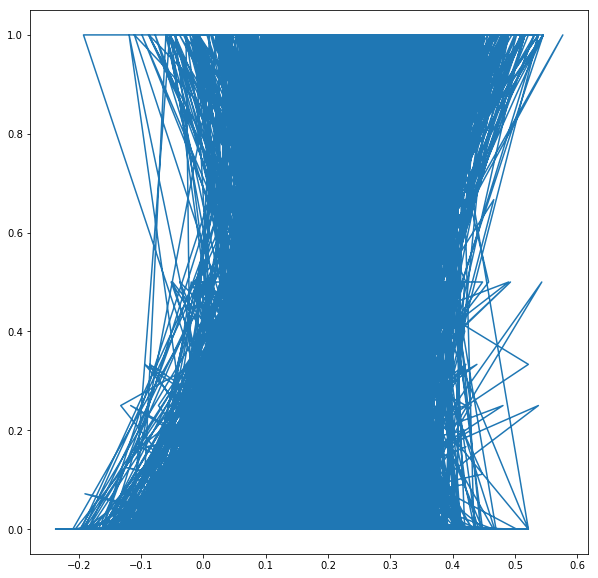

In [53]:
#картина маслом
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
plt.plot(answers, y_test)
plt.show()

In [56]:
def mse(y_pred, y_test):
    return (sum((y_pred - y_test)**2)/len(y_pred))*100
print 'Error =', mse(answers, y_test), '%'

Error = 11.1603117761 %
